In [0]:
import random
import numpy as np
from numpy.linalg import inv

'''
array_generate_helper (n)
paramater: n (integer) --> generate number of n 
return : an array with the length of n
'''

def Array_Generate_Helper(n):
  array = []
  for i in range (0,n):
    value = random.random()*10
    array.append(value)
  return array
  

'''
function preprocess:
paramater: N(double) --> array with size 100
paramater: P(Double) --> array with size 1000
return a N*P matrix --> 2d list
'''

def Preprocess(N,P):
  nPerson_array = np.array(Array_Generate_Helper(N))
  nBrain_array  = np.array(Array_Generate_Helper(P))
  # convert the np_format array to np_matrix 
  nPerson_matrix = nPerson_array.reshape(N,1)
  nBrain_matrix = nBrain_array.reshape(1,P)
  #do the mutiply 
  result = np.dot(nPerson_matrix ,nBrain_matrix);
  # print(result.shape)
  return result


def Generate_X_y_c(a,b):
  # build up a matrix with [a,b]
  X= Preprocess(a,b)
  #build a np array with length a
  y = np.array(Array_Generate_Helper(a))
  c = np.array(Array_Generate_Helper(a))
  return X,y,c


In [0]:
import scipy.linalg as la
from sklearn import linear_model

'''
glabally generating the X and y to maintain the X, y consistently
'''
# X,y =Generate_X_y(1000000,2)

'''
Calculate_Beta_Hand:
param: X --> a n * p matrix
param: y --> a n * 1 array
return: beta --> coeffience of the linear regression
''' 
def Calculate_Beta_Hand(X,y):
  #calculate the by using the defination of beta
  beta = la.inv(X.T@X) @ X.T @ y
  # print(beta)
  return beta


'''
Calculate_Beta_Sklean:
param: X --> a n * p matrix
param: y --> a n * 1 array
return: beta --> coeffience of the linear regression
'''
def Calculate_Beta_Sklearn(X,y):
  # using linear regression model from sklearn 
  lm = linear_model.LinearRegression()
  #fit the x,y to the model,x will be a 2d matrix and y is a array
  model = lm.fit(X,y)
  #default method to calculate the beta
  beta = model.coef_
  inter = model.intercept_
  # print(beta)
  return beta,inter

'''
Calculate_Beta_Numpy:
param: X --> a n * p matrix
param: y --> a n * 1 array
return: beta --> coeffience of the linear regression
'''
def Calculate_Beta_Numpy(X,y):
  N = y.shape[0]
  Ones = np.ones([N,1])
  A = np.concatenate([X,Ones],1)
  beta = np.linalg.lstsq(A, y)[0]
  # print(beta)
  return beta


In [0]:
from sklearn.utils import resample

'''
Resample_Sklean
paramater: l --> the number of time of reampling 
parameter: func --> the function of calculate the beta
'''

def Resample_Sklearn(l,func,X,y):
  betalist = []
  interlist = []
  for i in range(0,l):
    # randomly resample the dataset with the original set with replacement
    a = resample(X,n_samples=len(X),replace=True, random_state=i)
    beta,inter = func(a,y)
    betalist.append(beta)
    interlist.append(inter)
  return betalist,interlist

In [4]:
'''
model_2

C = c0 + Age*c1 + Mi*c2
C: cognitive scores, size (Nx1)
M: brain data, size (NxP)
Age: vector of ages, size (Nx1)
i: cycle over all brain locations: P
c0 : parameter estimate of the constant term in the regression model, size (1x1)
c1: parameter estimate for the predictor Age, size (1x1)
c2: parameter estimate for the predictor brain (Mi) at location i, size (1xP)

return  C

https://datatofish.com/multiple-linear-regression-python/
'''

'\nmodel_2\n\nC = c0 + Age*c1 + Mi*c2\nC: cognitive scores, size (Nx1)\nM: brain data, size (NxP)\nAge: vector of ages, size (Nx1)\ni: cycle over all brain locations: P\nc0 : parameter estimate of the constant term in the regression model, size (1x1)\nc1: parameter estimate for the predictor Age, size (1x1)\nc2: parameter estimate for the predictor brain (Mi) at location i, size (1xP)\n\nreturn  C\n\nhttps://datatofish.com/multiple-linear-regression-python/\n'

In [0]:
m,age,c = Generate_X_y_c(100,1000)

resample_time = 1000

In [0]:

# mi = m[:,0].reshape(-1,1)
# print(mi)
def m1_bootstrap(m,age):
  coeflist=[]
  interlist=[]
  for i in range(0,len(m[0])):
    mi = m[:,i].reshape(-1,1)
    result_coef, result_inter = Resample_Sklearn(resample_time ,Calculate_Beta_Sklearn,mi,age)
    coeflist.append(result_coef)
    interlist.append(result_inter)
  coeflist =np.array(coeflist)
  interlist =np.array(interlist)
  return coeflist, interlist

def m2_bootstrap(m,age,c): 
  agei = age.reshape(-1,1)
  ci = c.reshape(-1,1)
  coeflist=[]
  interlist=[]
  for i in range(0,len(m[0])):
    mi = m[:,i].reshape(-1,1)
    combine = np.concatenate((agei,mi),axis=1)
    # print(combine)
    result_coef, result_inter = Resample_Sklearn(resample_time ,Calculate_Beta_Sklearn,combine,ci)
    coeflist.append(result_coef)
    interlist.append(result_inter)
  coeflist =np.array(coeflist)
  interlist =np.array(interlist)
  return coeflist, interlist
 


In [0]:
from astropy.stats import jackknife_resampling
from astropy.stats import jackknife_stats

def m1_jackknife(m,age):
 
  coeflist_jackknife=[]
  interlist_jackknife=[]
  for i in range(0,len(m[0])):
    mjack = m[:,i]
    resamples = jackknife_resampling(mjack)
    for ii in range(0,len(resamples)):
      resamplesi = np.append(resamples[ii],[1])
      resamplesi = resamplesi.reshape(-1,1)
      result_coef_jackknife,result_inter_jackknife= Calculate_Beta_Sklearn(resamplesi,age)
      coeflist_jackknife.append(result_coef_jackknife)
      interlist_jackknife.append(result_inter_jackknife)
    # result = Calculate_Beta_Numpy(mi,age)
    # coeflist.append(result)
  coeflist_jackknife =np.array(coeflist_jackknife)
  interlist_jackknife =np.array(interlist_jackknife)
  return coeflist_jackknife,interlist_jackknife


def m2_jackknife(m,age,c):
 
  coeflist_jackknife=[]
  interlist_jackknife=[]
  ages = jackknife_resampling(age)
  cs = jackknife_resampling(c)
  np.random.shuffle(ages)
  np.random.shuffle(cs)

  for i in range(0,len(m[0])):
    mjack = m[:,i]
    resamples = jackknife_resampling(mjack)

    for ii in range(0,len(resamples)):
      ci = cs[ii].reshape(-1,1)
      agei = ages[ii].reshape(-1,1)
      # print(ages[ii])
      # resamplesi = np.append(resamples[ii],[1])
      resamplesi = resamples[ii].reshape(-1,1)
      combine = np.concatenate((agei,resamplesi),axis=1)
      result_coef_jackknife,result_inter_jackknife = Calculate_Beta_Sklearn(combine,ci)
      coeflist_jackknife.append(result_coef_jackknife)
      interlist_jackknife.append(result_inter_jackknife)
    # result = Calculate_Beta_Numpy(mi,age)
    # coeflist.append(result)
  coeflist_jackknife =np.array(coeflist_jackknife)
  interlist_jackknife =np.array(interlist_jackknife)
  return coeflist_jackknife,interlist_jackknife



In [0]:
from scipy import stats
def m2_zscore(coeflist):
  z = stats.zscore(coeflist)
  return z

In [0]:
import math
def calculate_bias_interval(array,percent):
  lower = (1-percent)/2
  upper = 1-lower
  length = array.size
  lower_index = math.ceil((length *lower))
  upper_index = math.floor((length *upper))
  return array[lower_index:upper_index]



In [0]:

def plot_x_y(y,name,type,size,resample):
  plt.hist(y, size)
  plt.title( type +name+' over'+ resample+ 'sampling')
  plt.xlabel(type)
  plt.ylabel('frequency')
  plt.show()


In [11]:
import matplotlib.pyplot as plt
import time
start=time.time()
m1_bt_beta_list,m1_bt_inter_list = m1_bootstrap(m,age)

m1_jk_beta_list,m1_jk_inter_list = m1_jackknife(m,age)

m2_jk_beta_list,m2_jk_inter_list = m2_jackknife(m,age,c)

m2_bt_beta_list,m2_bt_inter_list = m2_bootstrap(m,age,c)
# print(m1_bt_beta_list)
# print(m1_bt_inter_list)
end=time.time()
print('Running time: %s Seconds'%(end-start))

Running time: 1383.0288906097412 Seconds


1000000
-1.4036689545259586


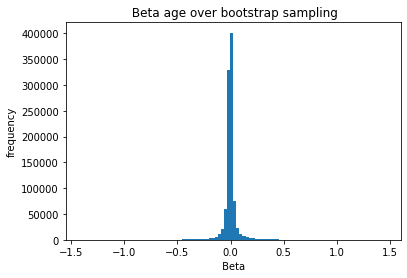

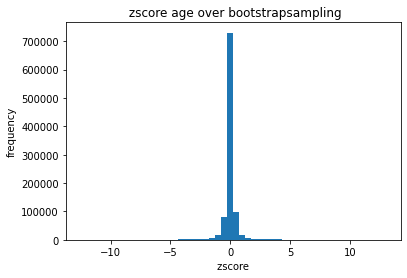

In [12]:
y_bt = m1_bt_beta_list.ravel()
print(y_bt.size)
y_bt_bias = calculate_bias_interval(np.sort(y_bt),0.995)
m1_bt_beta_zscore = m2_zscore(y_bt_bias)
print(y_bt_bias[0])
plot_x_y(y_bt_bias,"age"," Beta ",100,' bootstrap ')
plot_x_y(m1_bt_beta_zscore,"age", " zscore ",50,' bootstrap')

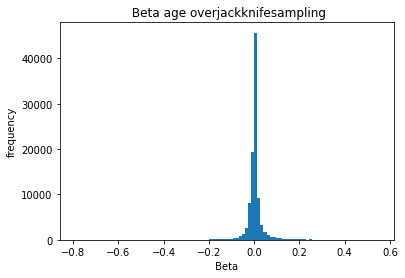

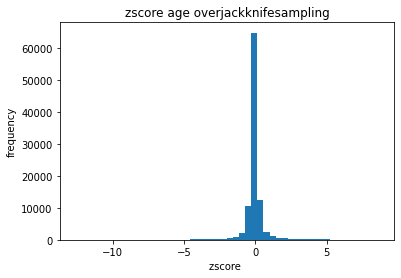

In [13]:
y_jk = m1_jk_beta_list[:,0].ravel()
y_jk_bias = calculate_bias_interval(np.sort(y_jk),0.995)
m1_jk_beta_zscore = m2_zscore(y_jk_bias)
plot_x_y(y_jk_bias,"age"," Beta ",100,'jackknife')
plot_x_y(m1_jk_beta_zscore,"age", "zscore ",50,'jackknife')


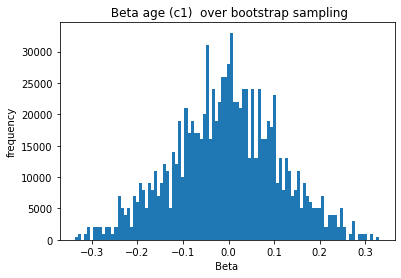

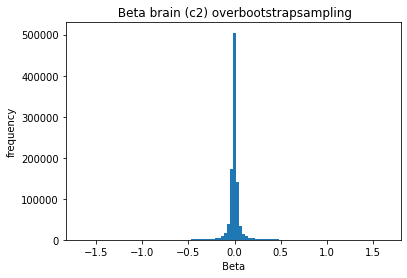

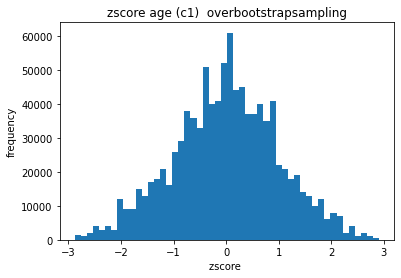

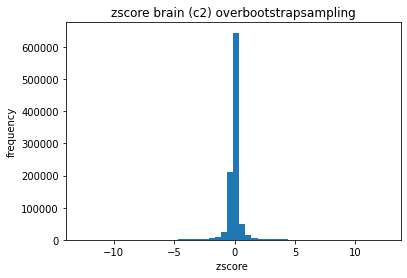

In [14]:
y1_bt = m2_bt_beta_list[:,:,:,0].ravel()
y2_bt = m2_bt_beta_list[:,:,:,1].ravel()

y1_bt_bias = calculate_bias_interval(np.sort(y1_bt),0.995)
y2_bt_bias = calculate_bias_interval(np.sort(y2_bt),0.995)
m2_bt_beta_zscore_1 = m2_zscore(y1_bt_bias)
m2_bt_beta_zscore_2 = m2_zscore(y2_bt_bias)
plot_x_y(y1_bt_bias,"age (c1) "," Beta ",100,' bootstrap ')
plot_x_y(y2_bt_bias,"brain (c2)"," Beta ",100,'bootstrap')
plot_x_y(m2_bt_beta_zscore_1,"age (c1) ", "zscore " ,50,'bootstrap')
plot_x_y(m2_bt_beta_zscore_2,"brain (c2)", "zscore ",50,'bootstrap')

100000


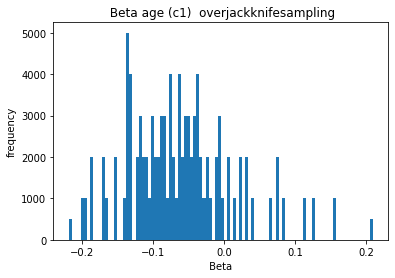

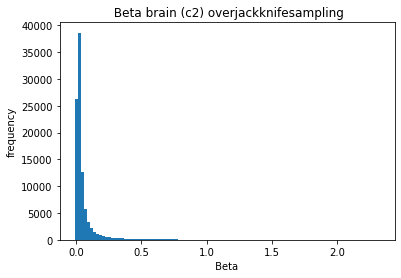

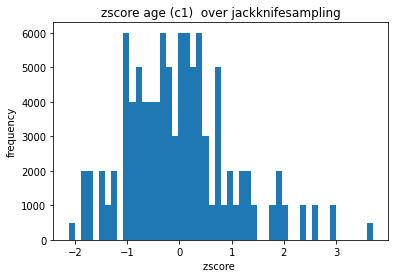

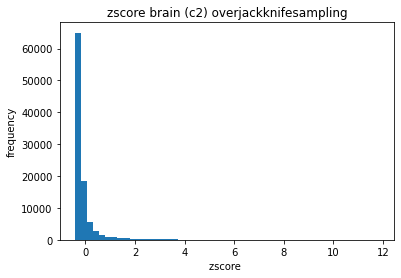

In [15]:
y1_jk = m2_jk_beta_list[:,:,0].ravel()
y2_jk = m2_jk_beta_list[:,:,1].ravel()
print(y2_jk.size)
y1_jk_bias = calculate_bias_interval(np.sort(y1_jk),0.99)
y2_jk_bias = calculate_bias_interval(np.sort(y2_jk),0.99)
m2_jk_beta_zscore_1 = m2_zscore(y1_jk_bias)
m2_jk_beta_zscore_2 = m2_zscore(y2_jk_bias)
plot_x_y(y1_jk_bias,"age (c1) "," Beta ",100,'jackknife')
plot_x_y(y2_jk_bias,"brain (c2)"," Beta ",100,'jackknife')
plot_x_y(m2_jk_beta_zscore_1,"age (c1) ", "zscore ",50,' jackknife')
plot_x_y(m2_jk_beta_zscore_2,"brain (c2)", "zscore ",50,'jackknife')

1000000
1000000


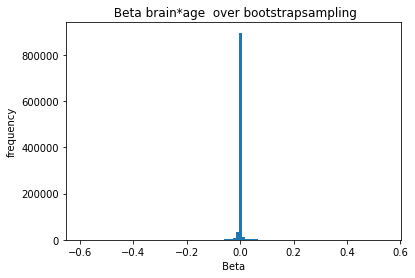

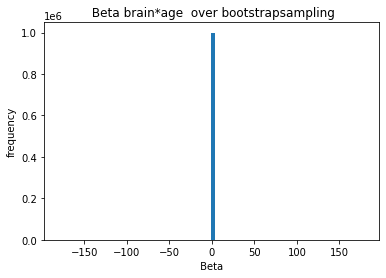

In [16]:
print(y_bt.size)
cross_bt = np.multiply(y_bt,y2_bt)
print(y_bt.size)
cross_bt_bias = calculate_bias_interval(np.sort(cross_bt),0.99)
cross_bt_zscore = m2_zscore(cross_bt)
plot_x_y(cross_bt_bias,"brain*age "," Beta ",100,' bootstrap')
plot_x_y(cross_bt_zscore,"brain*age "," Beta ",100,' bootstrap')

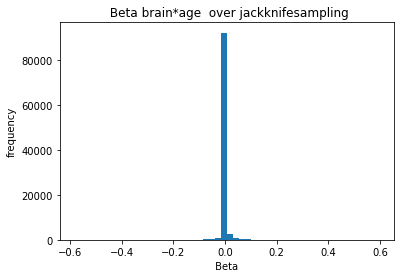

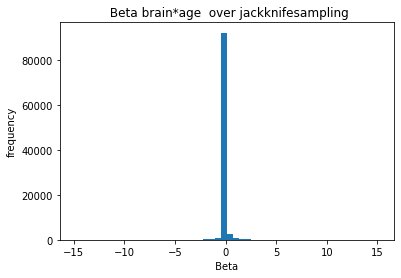

In [17]:

cross_jk = np.multiply(y_jk,y2_jk)

cross_jk_bias = calculate_bias_interval(np.sort(cross_jk),0.99)
cross_jk_zscore = m2_zscore(cross_jk_bias)
plot_x_y(cross_jk_bias,"brain*age "," Beta ",50,' jackknife')
plot_x_y(cross_jk_zscore,"brain*age "," Beta ",50,' jackknife')